In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("clean_labeled.csv")
df.head(10)

,Unnamed: 0,hostname,date,ping_jitter,ping_latency,ping_low,ping_high,day,predictions,basic_ema_anomaly,dspot_anomaly,tuned_dspot_anomaly
0,0,9cd30bf,2025-04-20 12:00:30,1.824,15.667,12.622,17.349,2025-04-20,False,False,False,False
1,1,b340432,2025-04-21 00:00:30,5.070,17.431,8.240,18.138,2025-04-21,False,False,True,False
2,2,b340432,2025-04-21 12:00:30,5.070,17.431,8.240,18.138,2025-04-21,False,False,True,False
3,4,9dc32f2,2025-04-22 12:00:30,8.191,11.906,8.095,21.929,2025-04-22,False,False,False,False
4,5,33fe84e,2025-04-23 03:00:24,1.036,13.099,12.911,14.710,2025-04-23,False,False,False,False
5,6,592a43c,2025-04-23 15:00:30,1.971,13.697,12.331,15.900,2025-04-23,False,False,False,False
6,7,38b6bf0,2025-04-24 03:00:30,1.276,8.031,7.480,11.690,2025-04-24,False,False,False,False
7,10,b5c8445,2025-04-25 15:00:30,1.560,17.572,15.803,19.353,2025-04-25,False,False,False,False
8,11,953d46d,2025-04-26 03:00:30,1.728,16.745,16.235,19.675,2025-04-26,False,False,False,False
9,16,7f6d63d,2025-04-28 18:00:30,2.183,12.508,11.773,16.269,2025-04-28,False,False,False,False


In [4]:
df["date"] = pd.to_datetime(df["date"])

In [5]:
df["date_ordinal"] = df["date"].apply(lambda x: x.toordinal())

In [8]:
df["label"] = df["predictions"].map({True: 1, False: -1})

In [9]:
hostname = "b340432" #df for one host
hdf = df[df["hostname"] == hostname]

In [12]:
reg = hdf[hdf["predictions"] == False]
anomalies = hdf[hdf["predictions"] == True]

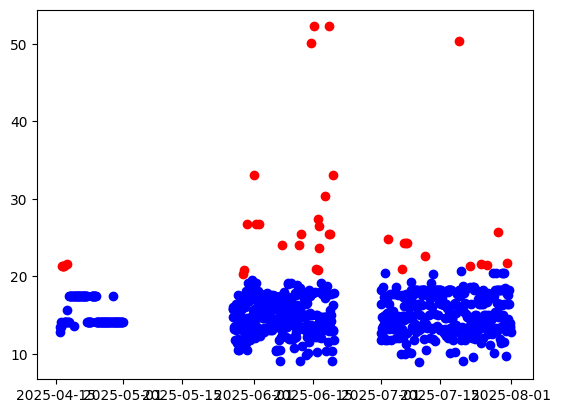

In [13]:
plt.scatter(reg["date"], reg["ping_latency"], color="blue")
plt.scatter(anomalies["date"], anomalies["ping_latency"], color="red")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
#train test split
X = hdf[["date_ordinal", "ping_latency"]]
y = hdf["label"]
X.shape, y.shape

((890, 2), (890,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 2), (178, 2), (712,), (178,))

In [18]:
#attempt to learn w lin classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

models = [LogisticRegression(), LinearSVC()] #in case we want to automate model selection

clf = models[0]
clf.fit(X_train[:, 1].reshape(-1, 1), y_train)

y_pred = clf.predict(X_test[:, 1].reshape(-1, 1))
f1 = f1_score(y_test, y_pred, average='macro')
print(f"f1 score: {f1}")

f1 score: 1.0


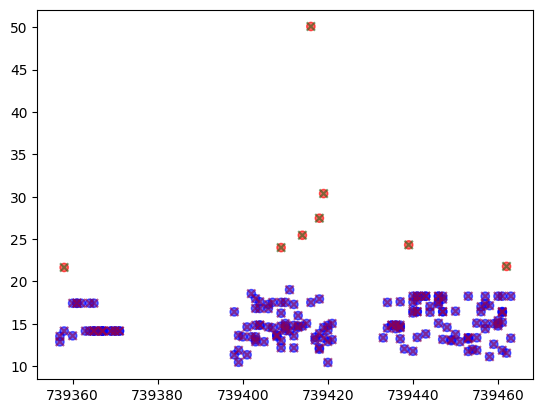

In [19]:
#plot results predicted anomalies

#train test
# plt.scatter(X_train["date"], X_train["ping_latency"], color="blue", label="")
plt.scatter(
    np.array(X_test)[:, 0], 
    np.array(X_test)[:, 1], 
    c=y_test,              # color by labels (1 or -1)
    cmap='bwr',             # blue = reg, red = anomalies
    alpha=0.6
)


plt.scatter(
    np.array(X_test)[:, 0], 
    np.array(X_test)[:, 1], 
    c=y_pred,              # color by labels (1 or -1)
    cmap='PiYG',             # pink x = pred reg, green x = pred anomalies
    alpha=0.6,
    marker ="x"
)
plt.show()